# Bernstein Filter 

#### This is my implementation of Bernstein Filter in Python. (Use at your own risk!)

In [1]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
%matplotlib inline

In [3]:
def bernupdate(inputimg, rowbegin, colbegin):
    """
    Helper function, regular user should not use or modify it.
    """
    inputimg_ij = inputimg[rowbegin:-1:2, colbegin:-1:2]

    d1 = (inputimg[rowbegin - 1:-2:2, colbegin:-1:2] + inputimg[rowbegin + 1::2, colbegin:-1:2])/2.0 \
        - inputimg[rowbegin:-1:2, colbegin:-1:2]
    d2 = (inputimg[rowbegin:-1:2, colbegin - 1:-2:2] + inputimg[rowbegin:-1:2, colbegin + 1::2])/2.0 \
        - inputimg[rowbegin:-1:2, colbegin:-1:2]
        
    d = d1 * (np.abs(d1) <= np.abs(d2)) + d2 * (np.abs(d2) < np.abs(d1))
    
    inputimg_ij[...] +=d

def bernstein_filter(inputimg, total_iter = 10):
    """
    This function applies Bernstein Filter on input image for 10 iterations (default).
    
    Parameters:
        inputimg: 2D numpy array that contains image data.
        total_iter: number of iterations, default is 10.
        
    Return:
        2D numpy array, the input image is not modified.
    """
    lena = np.copy(inputimg)
    for iter_num in range(total_iter):
        bernupdate(lena, 1, 1)
        bernupdate(lena, 2, 1)
        bernupdate(lena, 1, 2)
        bernupdate(lena, 2, 2)
        
    return lena

In [4]:
lena_original = io.imread('../images/lena.png')

# We need to convert the datatype to Float32
lena = lena_original.astype('float32', copy= True)

In [5]:
lena_filtered = bernstein_filter(lena)

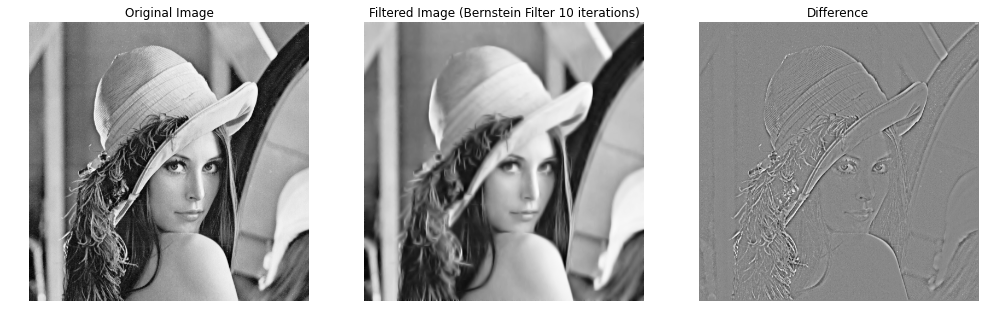

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (17,8))
axes[0].imshow(lena, cmap=cm.Greys_r)
axes[0].set_title('Original Image')
axes[0].set_axis_off()
axes[1].imshow(lena_filtered, cmap=cm.Greys_r)
axes[1].set_title('Filtered Image (Bernstein Filter 10 iterations)')
axes[1].set_axis_off()

axes[2].imshow(lena - lena_filtered, cmap=cm.Greys_r)
axes[2].set_title('Difference')
axes[2].set_axis_off()